In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [26]:
elephant = image.load_img('/content/elephant/elephant.jpg', target_size=(224, 224))
elephant_itr = image.load_img('/content/elephant/elephantintheroom.jpg', target_size=(224, 224))

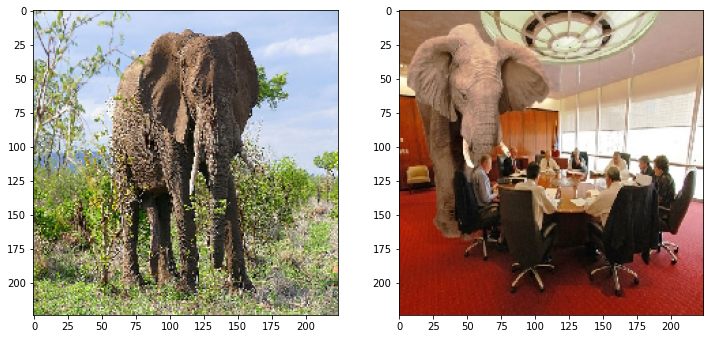

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(elephant)
ax[1].imshow(elephant_itr)

In [27]:
def preprocesser(img):
  x = image.img_to_array(img)
  x =  np.expand_dims(x, axis = 0)
  x = preprocess_input(x)
  return x

In [28]:
elephant = preprocesser(elephant)
elephant_itr = preprocesser(elephant_itr)

In [20]:
model = VGG16(weights = 'imagenet')

553476096/553467096 [==============================] - 6s 0us/step


In [31]:
preds_elephant = model.predict(elephant)
preds_elephant_itr = model.predict(elephant_itr)

In [47]:
labels = keras.applications.vgg16.decode_predictions(np.expand_dims(np.arange(1000), 0), top=1000) #list of list
print("L'immagine dell'elefante africano è stata classificata come: ", labels[0][-np.argmax(preds_elephant)-1][1])
print("L'immagine dell'elefante africano in un ufficio è stata classificata come: ", labels[0][-np.argmax(preds_elephant_itr)-1][1])

L'immagine dell'elefante africano è stata classificata come:  African_elephant
L'immagine dell'elefante africano in un ufficio è stata classificata come:  library


In [58]:
first_5_predictions = preds_elephant_itr[0].argsort()[-5:][::-1]
first_5_predictions

array([624, 892, 788, 762, 865])

In [60]:
for i, pred in enumerate(first_5_predictions):
  print(f" {i+1} prediction: {labels[0][-pred-1][1]}")

 1 prediction: library
 2 prediction: wall_clock
 3 prediction: shoe_shop
 4 prediction: restaurant
 5 prediction: toyshop
